In [3]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
import torch.nn.functional as F
from torchviz import make_dot
from torchinfo import summary
from tqdm.notebook import tqdm

import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [4]:
# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = ':'


# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

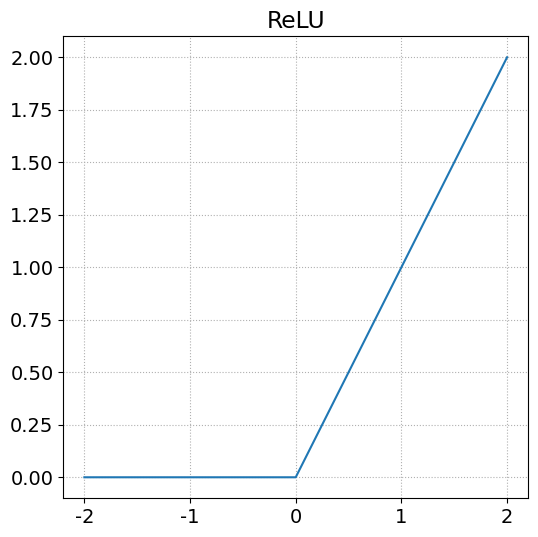

In [10]:
relu = nn.ReLU()
x_np = np.arange(-2, 2.1, 0.25)
x = torch.tensor(x_np).float()
y = relu(x)

plt.plot(x, y)
plt.title('ReLU')
plt.show()

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [12]:
x_np = np.arange(-2.0, 2.1, 0.25)
y_np = np.arange(-1.0, 3.1, 0.25)

x = torch.tensor(x_np).float()
y = torch.tensor(y_np).float()

z = x * y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000])


In [13]:
x = x.to(device)

print(x.device)
print(y.device)

cuda:0
cpu


In [17]:
y = y.to(device)

z = x*y
print(z)

print(z.device)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000], device='cuda:0')
cuda:0


In [6]:
data_root = './data'

train_set0 = datasets.MNIST(
    root=data_root,
    train=True,
    download=True
)

In [19]:
!ls -lR ./data/MNIST

'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [29]:
print(type(train_set0))
print()
print(train_set0)
print()
print(len(train_set0))
print()

image, label = train_set0[0]

print(type(image))
print(type(label))
print(np.array(image).max())
print(np.array(image).min())

<class 'torchvision.datasets.mnist.MNIST'>

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train

60000

<class 'PIL.Image.Image'>
<class 'int'>
255
0


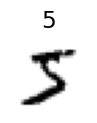

In [37]:
plt.figure(figsize=(1, 1))
plt.title(f"{label}")
plt.imshow(image, cmap='gray_r')
plt.axis('off')
plt.show()

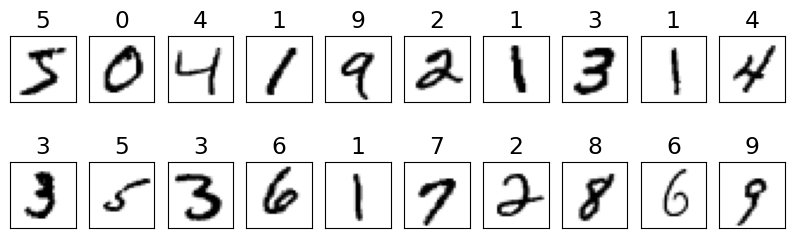

In [38]:
plt.figure(figsize=(10, 3))

for i in range(20):
    ax = plt.subplot(2, 10, i+1)

    image, label = train_set0[i]

    plt.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [39]:
transform1 = transforms.Compose([
    transforms.ToTensor(),
])

train_set1 = datasets.MNIST(
    root=data_root,
    train=True,
    download=True,
    transform=transform1
)

In [41]:
image, label = train_set1[0]
print(type(image))
print(image.shape)
print(image.data.min())
print(image.data.max())

<class 'torch.Tensor'>
torch.Size([1, 28, 28])
tensor(0.)
tensor(1.)


In [42]:
transform2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5),
])

train_set2 = datasets.MNIST(
    root=data_root,
    train=True,
    download=True,
    transform=transform2
)

In [46]:
image, label = train_set2[0]
print(type(image))
print(image.shape)
print(image.data.min())
print(image.data.max())

<class 'torch.Tensor'>
torch.Size([1, 28, 28])
tensor(-1.)
tensor(1.)


In [54]:
def f(x):
    return 1/np.exp(-10*x)

lambda x: 1/np.exp(-10*x)

<function __main__.<lambda>(x)>

In [55]:
def f(x):
    return (2 * x**2 + 2)

x = np.arange(-2, 2.1, 0.25)
y = f(x)
print(y)

print('='*80)

g = lambda x: 2 * x**2 + 2

y = g(x)
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]
[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


In [56]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Lambda(lambda x: x.view(-1))
])

train_set = datasets.MNIST(
    root = data_root,
    train=True,
    download=True,
    transform=transform
)

In [58]:
transform3 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Lambda(lambda x: x.view(-1))
])

train_set3 = datasets.MNIST(
    root = data_root,
    train=True,
    download=True,
    transform=transform3
)

In [59]:
image, label = train_set3[0]
print('shape : ', image.shape)
print('최솟값 : ', image.data.min())
print('최댓값 : ', image.data.max())

shape :  torch.Size([784])
최솟값 :  tensor(-1.)
최댓값 :  tensor(1.)


In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Lambda(lambda x: x.view(-1))
])

In [8]:
train_set = datasets.MNIST(
    root = data_root,
    train=True,
    download=True,
    transform=transform
)

test_set = datasets.MNIST(
    root=data_root,
    train=False,
    download=True,
    transform=transform
)

In [9]:
from torch.utils.data import DataLoader

batch_size = 500

train_loader = DataLoader(
    dataset=train_set,
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    dataset=test_set,
    batch_size=batch_size,
    shuffle=False
)

In [10]:
print(len(train_loader))

for images, labels in train_loader:
    break

print(images.shape)
print(labels.shape)

120
torch.Size([500, 784])
torch.Size([500])


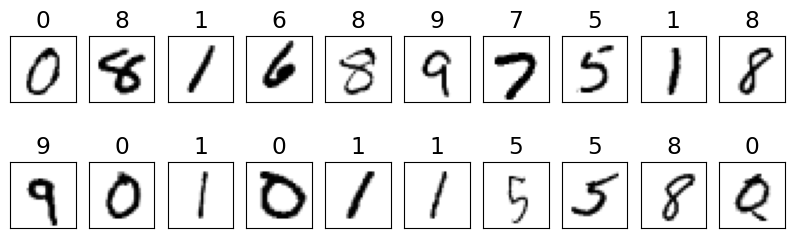

In [12]:
plt.figure(figsize=(10, 3))

for i in range(20):
    ax = plt.subplot(2, 10, i+1)

    image = images[i].numpy()
    label = labels[i]

    image2 = (image + 1) / 2

    plt.imshow(image2.reshape(28, 28), cmap='gray_r')
    ax.set_title(f"{label}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
n_input = image.shape[0]
n_output = len(set(list(labels.data.numpy())))
n_hidden = 128

print(n_input, n_output, n_hidden)

784 10 128


In [14]:
class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3

In [15]:
torch.manual_seed(123)
torch.cuda.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True

net = Net(n_input, n_output, n_hidden)

net = net.to(device)

In [16]:
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

In [17]:
for parameter in net.named_parameters():
    print(parameter)
    print('='* 50)

('l1.weight', Parameter containing:
tensor([[-0.0146,  0.0012, -0.0177,  ...,  0.0277,  0.0200,  0.0315],
        [ 0.0184, -0.0322,  0.0175,  ...,  0.0089, -0.0028, -0.0033],
        [ 0.0092,  0.0261,  0.0075,  ...,  0.0061,  0.0267, -0.0258],
        ...,
        [ 0.0235, -0.0026, -0.0129,  ...,  0.0322, -0.0059, -0.0169],
        [-0.0328, -0.0258,  0.0124,  ..., -0.0049,  0.0006,  0.0334],
        [ 0.0187, -0.0076, -0.0202,  ...,  0.0325, -0.0159, -0.0240]],
       device='cuda:0', requires_grad=True))
('l1.bias', Parameter containing:
tensor([ 0.0325, -0.0298,  0.0013,  0.0199,  0.0268, -0.0248, -0.0172, -0.0355,
         0.0122, -0.0048,  0.0214,  0.0202, -0.0243,  0.0015, -0.0276,  0.0296,
         0.0341, -0.0228,  0.0230,  0.0347, -0.0091, -0.0346,  0.0206, -0.0060,
         0.0329,  0.0047,  0.0180,  0.0101,  0.0177, -0.0309,  0.0228, -0.0224,
         0.0321,  0.0179,  0.0321,  0.0184,  0.0219, -0.0089,  0.0310, -0.0039,
        -0.0074, -0.0317,  0.0192, -0.0021,  0.0190

In [18]:
print(net)

Net(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [19]:
summary(net, (784, ))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [10]                      --
├─Linear: 1-1                            [128]                     100,480
├─ReLU: 1-2                              [128]                     --
├─Linear: 1-3                            [10]                      1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 12.87
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.41
Estimated Total Size (MB): 0.41

In [20]:
for images, labels in train_loader:
    break

inputs = images.to(device)
labels = labels.to(device)

In [21]:
outputs = net(inputs)

print(outputs)

tensor([[-0.3622, -0.1927, -0.0179,  ...,  0.1073,  0.1025, -0.0615],
        [-0.4072, -0.1814,  0.0716,  ...,  0.1866,  0.1975,  0.1161],
        [-0.3221, -0.0547, -0.2868,  ...,  0.1967, -0.0103,  0.1591],
        ...,
        [-0.2091, -0.1058,  0.2365,  ...,  0.1360,  0.0665,  0.0987],
        [-0.2756, -0.2012,  0.1703,  ...,  0.1223,  0.2388,  0.0233],
        [-0.3045, -0.2458,  0.1416,  ...,  0.1012,  0.0820, -0.1457]],
       device='cuda:0', grad_fn=<AddmmBackward0>)


In [22]:
loss = criterion(outputs, labels)
print(loss)

tensor(2.3329, device='cuda:0', grad_fn=<NllLossBackward0>)


In [ ]:
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [23]:
next(net.parameters()).is_cuda

True

In [24]:
loss.backward()

In [25]:
w = net.to('cpu')
print(w.l1.weight.grad.numpy())
print(w.l1.bias.grad.numpy())
print(w.l2.weight.grad.numpy())
print(w.l2.bias.grad.numpy())

[[-0.0007 -0.0007 -0.0007 ... -0.0007 -0.0007 -0.0007]
 [ 0.0077  0.0077  0.0077 ...  0.0077  0.0077  0.0077]
 [-0.0018 -0.0018 -0.0018 ... -0.0018 -0.0018 -0.0018]
 ...
 [-0.0008 -0.0008 -0.0008 ... -0.0008 -0.0008 -0.0008]
 [ 0.0011  0.0011  0.0011 ...  0.0011  0.0011  0.0011]
 [-0.0001 -0.0001 -0.0001 ... -0.0001 -0.0001 -0.0001]]
[ 0.0007 -0.0077  0.0018  0.0008 -0.      0.      0.0014 -0.0008  0.0025
 -0.0016  0.0009 -0.002   0.0006  0.0025 -0.0026  0.0008  0.0061 -0.0011
 -0.0018  0.008   0.0063  0.0026 -0.0036  0.0056 -0.0006 -0.0038  0.0034
  0.     -0.0026 -0.0032 -0.0006  0.0034  0.0018  0.      0.0001  0.0002
  0.0047 -0.0012  0.0022  0.0018  0.0037 -0.0061  0.0011  0.0097 -0.0017
 -0.0012 -0.0004 -0.001  -0.0031 -0.0003 -0.0008  0.0004  0.0001 -0.0016
 -0.002  -0.0001 -0.0006 -0.0024 -0.0004  0.0029  0.0013 -0.0085  0.0013
  0.0015  0.     -0.0006  0.004  -0.0016 -0.0052  0.0003 -0.0031  0.0001
  0.0009 -0.0017 -0.0069 -0.0028  0.0017 -0.003   0.0012  0.0024  0.0011
 -0.002

In [26]:
optimizer.step()

In [27]:
print(net.l1.weight)
print(net.l1.bias)

Parameter containing:
tensor([[-0.0146,  0.0012, -0.0177,  ...,  0.0278,  0.0200,  0.0316],
        [ 0.0183, -0.0322,  0.0174,  ...,  0.0088, -0.0029, -0.0034],
        [ 0.0092,  0.0261,  0.0075,  ...,  0.0061,  0.0267, -0.0258],
        ...,
        [ 0.0235, -0.0026, -0.0129,  ...,  0.0323, -0.0059, -0.0169],
        [-0.0329, -0.0258,  0.0124,  ..., -0.0049,  0.0006,  0.0334],
        [ 0.0187, -0.0076, -0.0202,  ...,  0.0325, -0.0159, -0.0240]],
       requires_grad=True)
Parameter containing:
tensor([ 3.2475e-02, -2.9682e-02,  1.2742e-03,  1.9874e-02,  2.6836e-02,
        -2.4759e-02, -1.7201e-02, -3.5517e-02,  1.2199e-02, -4.7449e-03,
         2.1379e-02,  2.0187e-02, -2.4297e-02,  1.4928e-03, -2.7613e-02,
         2.9618e-02,  3.4051e-02, -2.2777e-02,  2.2983e-02,  3.4580e-02,
        -9.1870e-03, -3.4619e-02,  2.0599e-02, -6.0632e-03,  3.2937e-02,
         4.7784e-03,  1.7949e-02,  1.0102e-02,  1.7700e-02, -3.0853e-02,
         2.2817e-02, -2.2391e-02,  3.2049e-02,  1.7890e-0

In [28]:
torch.manual_seed(123)
torch.cuda.manual_seed(123)

lr = 0.01
net = Net(n_input, n_output, n_hidden).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 10
history = np.zeros((0, 5))

In [29]:
from tqdm.notebook import tqdm

for epoch in range(num_epochs):
    train_acc, train_loss = 0, 0
    val_acc, val_loss = 0, 0
    n_train, n_test = 0, 0

    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        predicted = torch.max(outputs, 1)[1]

        train_loss += loss.item()
        train_acc += (predicted == labels).sum().item()

    for inputs_test, labels_test in tqdm(test_loader):
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

        outputs_test = net(inputs_test)
        loss_test = criterion(outputs_test, labels_test)
        predicted_test = torch.max(outputs_test, 1)[1]

        val_loss += loss_test.item()
        val_acc += (predicted_test == labels_test).sum().item()

    # 평가 결과 산출, 기록
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [1/10], loss: 1.82932 acc: 0.56958 val_loss: 1.32629, val_acc: 0.74660


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [2/10], loss: 1.03888 acc: 0.79537 val_loss: 0.79661, val_acc: 0.83180


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [3/10], loss: 0.70809 acc: 0.84110 val_loss: 0.60256, val_acc: 0.85850


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [4/10], loss: 0.57300 acc: 0.86057 val_loss: 0.51192, val_acc: 0.87140


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [5/10], loss: 0.50223 acc: 0.87102 val_loss: 0.45827, val_acc: 0.87920


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [6/10], loss: 0.45883 acc: 0.87877 val_loss: 0.42422, val_acc: 0.88650


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [7/10], loss: 0.42938 acc: 0.88327 val_loss: 0.40076, val_acc: 0.88970


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [8/10], loss: 0.40814 acc: 0.88743 val_loss: 0.38285, val_acc: 0.89370


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [9/10], loss: 0.39176 acc: 0.89065 val_loss: 0.36857, val_acc: 0.89680


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [10/10], loss: 0.37876 acc: 0.89313 val_loss: 0.35741, val_acc: 0.89930


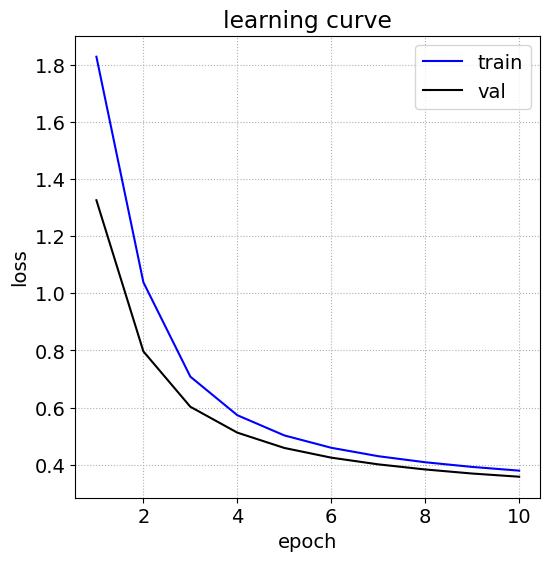

In [30]:
plt.plot(history[:,0], history[:,1], 'b', label='train')
plt.plot(history[:,0], history[:,3], 'k', label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('learning curve')
plt.legend()
plt.show()

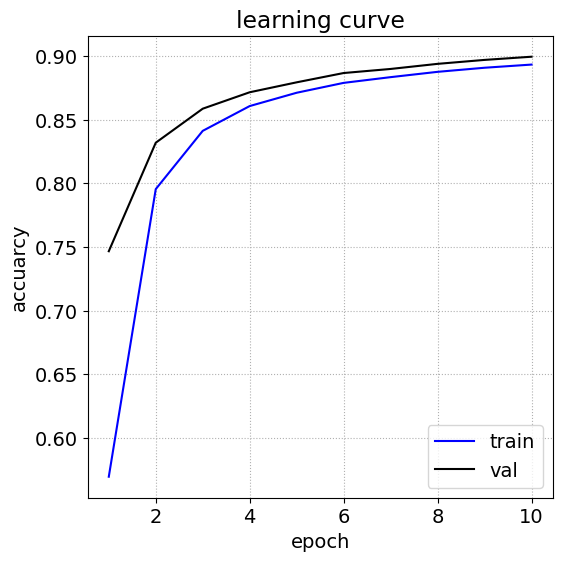

In [31]:
plt.plot(history[:,0], history[:,2], 'b', label='train')
plt.plot(history[:,0], history[:,4], 'k', label='val')
plt.xlabel('epoch')
plt.ylabel('accuarcy')
plt.title('learning curve')
plt.legend()
plt.show()

In [32]:
for images, labels in test_loader:
    break

inputs = images.to(device)
labels = labels.to(device)
outputs = net(inputs)
predicted = torch.max(outputs, 1)[1]

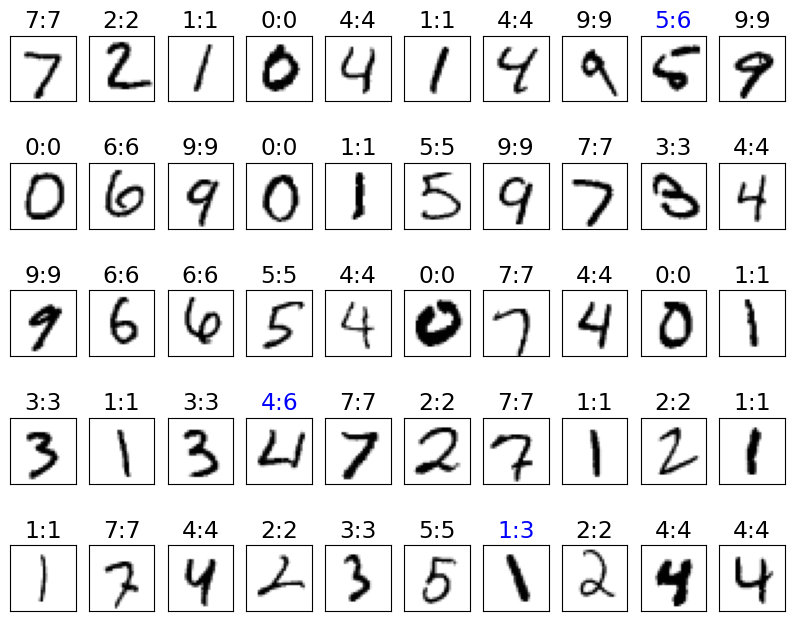

In [36]:
plt.figure(figsize=(10, 8))
for i in range(50):
    ax = plt.subplot(5, 10, i + 1)

    image = images[i]
    label = labels[i]
    pred = predicted[i]
    if (pred == label):
        c = 'k'
    else:
        c= 'b'

    image2 = (image + 1) / 2

    plt.imshow(image2.reshape(28, 28), cmap='gray_r')
    ax.set_title(f"{label}:{pred}", c=c)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [37]:
class Net2(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)
        self.l3 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        x4 = self.relu(x3)
        x5 = self.l3(x4)
        return x5

In [39]:
torch.manual_seed(123)
torch.cuda.manual_seed(123)

net = Net2(n_input, n_output, n_hidden).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)

In [41]:
print(net)

Net2(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [43]:
summary(net, (784, ))

Layer (type:depth-idx)                   Output Shape              Param #
Net2                                     [10]                      --
├─Linear: 1-1                            [128]                     100,480
├─ReLU: 1-2                              [128]                     --
├─Linear: 1-3                            [128]                     16,512
├─ReLU: 1-4                              [128]                     --
├─Linear: 1-5                            [10]                      1,290
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
Total mult-adds (M): 14.99
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.47
Estimated Total Size (MB): 0.48

In [44]:
for images, labels in test_loader:
    break

inputs = images.to(device)
labels = labels.to(device)

In [45]:
outputs = net(inputs)
loss = criterion(outputs, labels)
loss.backward()

In [49]:
w = net.to('cpu').l1.weight.grad.numpy()

print(w)
print(np.abs(w).mean())

[[-0.0007 -0.0007 -0.0007 ... -0.0007 -0.0007 -0.0007]
 [-0.0001 -0.0001 -0.0001 ... -0.0001 -0.0001 -0.0001]
 [-0.0005 -0.0005 -0.0005 ... -0.0005 -0.0005 -0.0005]
 ...
 [ 0.0015  0.0015  0.0015 ...  0.0015  0.0015  0.0015]
 [ 0.0002  0.0002  0.0002 ...  0.0002  0.0002  0.0002]
 [ 0.0003  0.0003  0.0003 ...  0.0003  0.0003  0.0003]]
0.0008487979


In [52]:
torch.manual_seed(123)
torch.cuda.manual_seed(123)

net = Net2(n_input, n_output, n_hidden).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 10
history2 = np.zeros((0, 5))

In [53]:
for epoch in range(num_epochs):
    train_acc = 0
    train_loss = 0
    val_acc = 0
    val_loss = 0
    n_train = 0
    n_test = 0

    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        predicted = torch.max(outputs, 1)[1]
        train_loss += loss.item()
        train_acc += (predicted == labels).sum().item()

    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

        outputs_test = net(inputs_test)
        loss_test = criterion(outputs_test, labels_test)

        predicted_test = torch.max(outputs_test, 1)[1]
        val_loss +=  loss_test.item()
        val_acc +=  (predicted_test == labels_test).sum().item()

    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history2 = np.vstack((history2, item))

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [1/10], loss: 2.20163 acc: 0.25380 val_loss: 2.04576, val_acc: 0.49800


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [2/10], loss: 1.75820 acc: 0.60438 val_loss: 1.39272, val_acc: 0.68680


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [3/10], loss: 1.11284 acc: 0.75650 val_loss: 0.86512, val_acc: 0.80820


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [4/10], loss: 0.75172 acc: 0.82293 val_loss: 0.63479, val_acc: 0.84390


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [5/10], loss: 0.59030 acc: 0.84980 val_loss: 0.52463, val_acc: 0.86380


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [6/10], loss: 0.50672 acc: 0.86655 val_loss: 0.46401, val_acc: 0.87430


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [7/10], loss: 0.45680 acc: 0.87545 val_loss: 0.42149, val_acc: 0.88570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [8/10], loss: 0.42335 acc: 0.88187 val_loss: 0.39552, val_acc: 0.89010


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [9/10], loss: 0.39965 acc: 0.88770 val_loss: 0.37601, val_acc: 0.89360


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [10/10], loss: 0.38195 acc: 0.89187 val_loss: 0.35886, val_acc: 0.89880


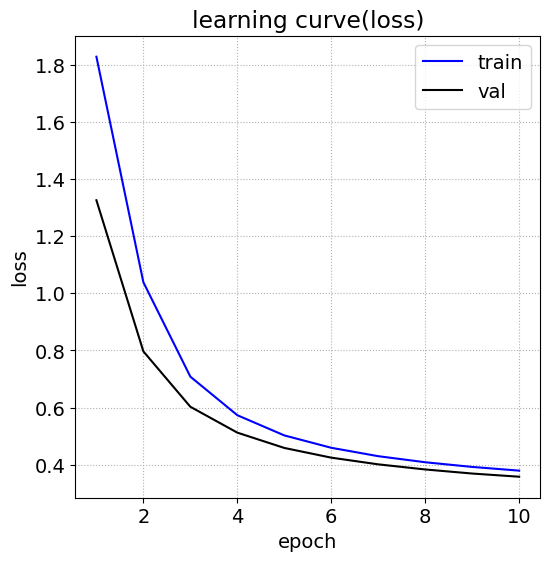

In [54]:
plt.plot(history[:, 0], history[:, 1], 'b', label='train')
plt.plot(history[:, 0], history[:, 3], 'k', label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('learning curve(loss)')
plt.legend()
plt.show()

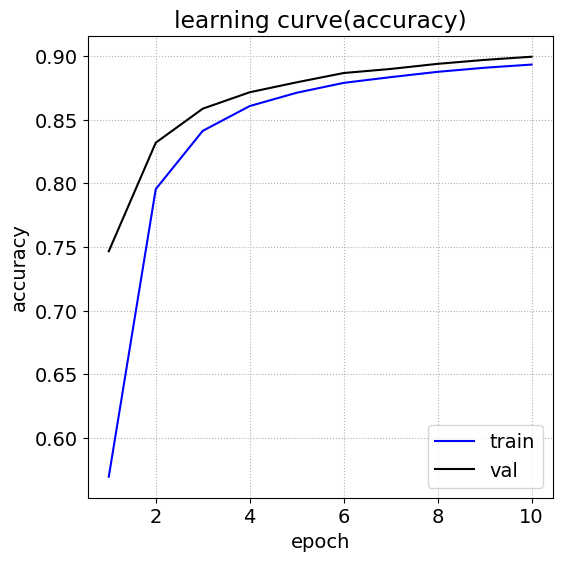

In [56]:
plt.plot(history[:, 0], history[:, 2], 'b', label='train')
plt.plot(history[:, 0], history[:, 4], 'k', label='val')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('learning curve(accuracy)')
plt.legend()
plt.show()

In [58]:
class Net3(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)
        self.l3 = nn.Linear(n_hidden, n_output)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.sigmoid(x1)
        x3 = self.l2(x2)
        x4 = self.sigmoid(x3)
        x5 = self.l3(x4)
        return x5

In [59]:
torch.manual_seed(123)
torch.cuda.manual_seed(123)

net = Net3(n_input, n_output, n_hidden).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 10
history2 = np.zeros((0, 5))

In [60]:
for epoch in range(num_epochs):
    train_acc = 0
    train_loss = 0
    val_acc = 0
    val_loss = 0
    n_train = 0
    n_test = 0

    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        predicted = torch.max(outputs, 1)[1]
        train_loss += loss.item()
        train_acc += (predicted == labels).sum().item()

    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

        outputs_test = net(inputs_test)
        loss_test = criterion(outputs_test, labels_test)

        predicted_test = torch.max(outputs_test, 1)[1]
        val_loss +=  loss_test.item()
        val_acc +=  (predicted_test == labels_test).sum().item()

    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history2 = np.vstack((history2, item))

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [1/10], loss: 2.30620 acc: 0.11050 val_loss: 2.29735, val_acc: 0.11350


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [2/10], loss: 2.29624 acc: 0.11237 val_loss: 2.29464, val_acc: 0.11350


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [3/10], loss: 2.29347 acc: 0.11322 val_loss: 2.29169, val_acc: 0.11350


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [4/10], loss: 2.29065 acc: 0.11247 val_loss: 2.28874, val_acc: 0.11350


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [5/10], loss: 2.28762 acc: 0.11248 val_loss: 2.28560, val_acc: 0.11350


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [6/10], loss: 2.28440 acc: 0.11403 val_loss: 2.28203, val_acc: 0.11510


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [7/10], loss: 2.28085 acc: 0.11788 val_loss: 2.27829, val_acc: 0.11370


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [8/10], loss: 2.27698 acc: 0.11635 val_loss: 2.27410, val_acc: 0.11420


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [9/10], loss: 2.27259 acc: 0.12178 val_loss: 2.26973, val_acc: 0.20350


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [10/10], loss: 2.26776 acc: 0.16575 val_loss: 2.26435, val_acc: 0.17630


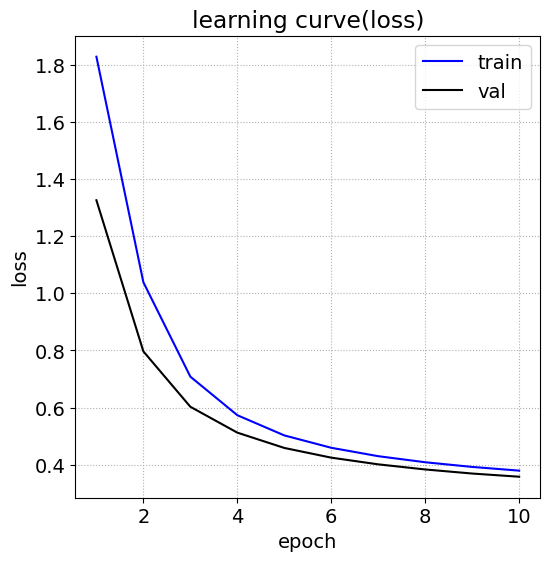

In [61]:
plt.plot(history[:, 0], history[:, 1], 'b', label='train')
plt.plot(history[:, 0], history[:, 3], 'k', label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('learning curve(loss)')
plt.legend()
plt.show()

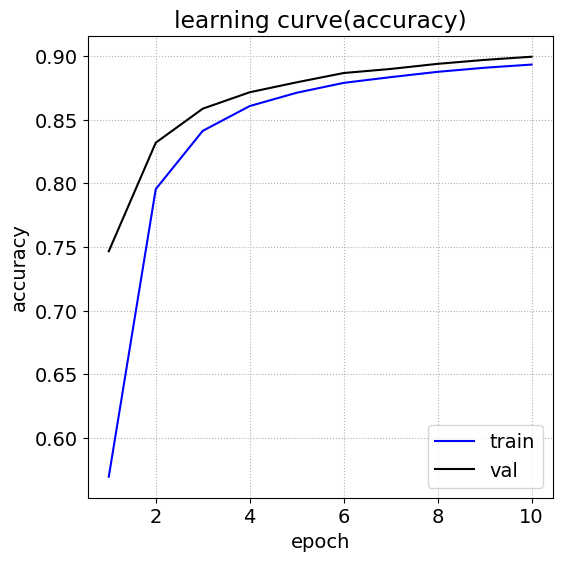

In [62]:
plt.plot(history[:, 0], history[:, 2], 'b', label='train')
plt.plot(history[:, 0], history[:, 4], 'k', label='val')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('learning curve(accuracy)')
plt.legend()
plt.show()